In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [33]:
# Load the CSV file
data = pd.read_csv("pima.csv")

#Split to X, Y
X=data.iloc[:,0:7]
X=np.array(X)
Y=data.iloc[:,8]
Y=np.array(Y)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

In [35]:
data.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [36]:
model = RandomForestClassifier() 
model.probability=True

number of trees = 100
max_depth = none
min_samples_split = 2
min_samples_leaf = 1




In [37]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [38]:
acc_train = (Y_train == model.predict(X_train)).mean()
acc_train

1.0

In [39]:
acc_test= (Y_test == model.predict(X_test)).mean()
acc_test

0.7272727272727273

In [40]:
y_predTe = model.predict(X_test)
conf_matrixTe = confusion_matrix(Y_test,y_predTe)

In [41]:
conf_matrixTe #test

array([[84, 13],
       [29, 28]], dtype=int64)

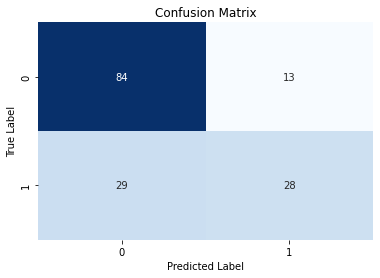

In [42]:
sns.heatmap(conf_matrixTe, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [43]:
y_predTr = model.predict(X_train)
conf_matrixTr = confusion_matrix(Y_train,y_predTr)

In [44]:
conf_matrixTr #train

array([[403,   0],
       [  0, 211]], dtype=int64)

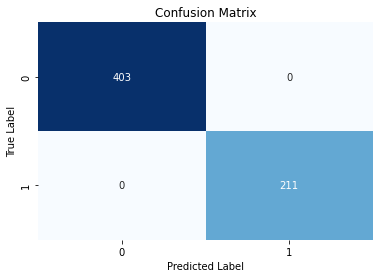

In [45]:
sns.heatmap(conf_matrixTr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [46]:
feautre_importances = np.array([tree.feature_importances_ for tree in model.estimators_])
feautre_importances = feautre_importances.mean(axis=0)
feautre_importances_std = feautre_importances.std(axis=0)
feautre_importances

array([0.11301166, 0.30236946, 0.09920195, 0.07428517, 0.07870784,
       0.19417205, 0.13825186])

In [47]:
model.estimators_[0].feature_importances_

array([0.07496523, 0.3552798 , 0.07378132, 0.05872856, 0.06911843,
       0.19718677, 0.17093989])

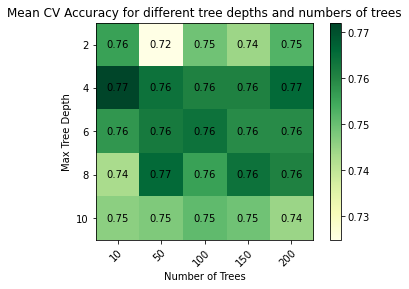

In [48]:
depths = [2, 4, 6, 8, 10]
trees = [10, 50, 100, 150, 200]

results = []
for depth in depths:
    results_row = []
    for tree in trees:
        model = RandomForestClassifier(n_estimators=tree, max_depth=depth, random_state=42)
        scores = cross_val_score(model, X_train, Y_train, cv=5)
        results_row.append(scores.mean())
    results.append(results_row)

fig, ax = plt.subplots()
im = ax.imshow(results, cmap='YlGn')

# Add labels to the plot
ax.set_xticks(range(len(trees)))
ax.set_yticks(range(len(depths)))
ax.set_xticklabels(trees)
ax.set_yticklabels(depths)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add title and axis labels
ax.set_title("Mean CV Accuracy for different tree depths and numbers of trees")
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Max Tree Depth")

# Loop over data dimensions and create text annotations
for i in range(len(depths)):
    for j in range(len(trees)):
        text = ax.text(j, i, f"{results[i][j]:.2f}",
                       ha="center", va="center", color="black")

plt.show()